In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

train image: 13721, label: 6.


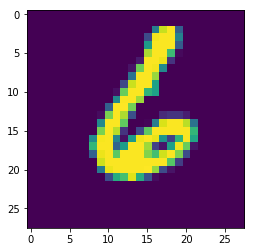

In [3]:
# random show training image
index=np.random.randint(0,mnist.train.images.shape[0])
print('train image: {}, label: {}.'.format(index,np.argmax(mnist.train.labels[index])))
plt.imshow(mnist.train.images[index].reshape(28,28))

In [4]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
tf.summary.scalar('cross_entropy', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
summary = tf.summary.merge_all()
sess = tf.InteractiveSession()
summary_writer = tf.summary.FileWriter('Mnist_model', sess.graph)
tf.global_variables_initializer().run()
for step in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    summary_str = sess.run(summary, feed_dict={x: batch_xs, y_: batch_ys})
    summary_writer.add_summary(summary_str, step)
    summary_writer.flush()

In [5]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
sess.close()

0.9187
